# BAFU dataset extraction

Author: Thiago Nascimento (thiago.nascimento@eawag.ch)

This notebook is used to retrieve and concatenate the BAFU dataset into hourly and daily resolutions. The output is one file per catchemnt (similar to the CAMELS_CH), with 5 columns: date, electric_cond(µS/cm), pH(-), temperature(°C) & oxygen_conc(mg/l)

## Requirements
**Python:**

* Python>=3.6
* Jupyter
* geopandas=0.10.2
* numpy
* os
* pandas=2.1.3
* scipy=1.9.0
* tqdm

Check the Github repository for an environment.yml (for conda environments) or requirements.txt (pip) file.

**Files:**

* 


**Directory:**

* Clone the GitHub directory locally
* Place any third-data variables in their respective directory.
* ONLY update the "PATH" variable in the section "Configurations", with their relative path to the EStreams directory. 


## References
* 
## Observations
* 

# Import modules

In [1]:
import pandas as pd
import numpy as np
import tqdm as tqdm
import os
import glob
import warnings


# Configurations

In [2]:
# Only editable variables:
# Relative path to your local directory
PATH = ".."
# Suppress all warnings
warnings.filterwarnings("ignore")

* #### The users should NOT change anything in the code below here. 

In [3]:
# Non-editable variables:
PATH_OUTPUT = "results/timeseries/"

# Set the directory:
os.chdir(PATH)

In [4]:
os.getcwd()

'c:\\Users\\nascimth\\Documents\\Thiago\\Eawag\\Python\\Scripts\\CAMELS_CH_chem'

# Import data
* BAFU

In [18]:
# Full dataset
path = r'data\phys_daten_BAFU\phys_daten_BAFU\\'

filenames = glob.glob(path + "*.csv")
len(filenames)

423

#### Hourly data
* Electric conductivity

In [6]:
# Define the two specific words you want to filter for
word1 = 'Elektrische'
word2 = 'Tagesmittel'

# Filter CSV files based on whether their names contain both words
electric_filenames = [file for file in filenames if (word1 in file) and (word2 in file)]
len(electric_filenames)

19

* BAFU: 2290 is located elsewhere (2290_St-Sulpice_Areuse_Eawag_CAMELS_CH)
* NADUF: 2046, 2044 and 2045 (not BAFU).

* pH

In [7]:
# Define the two specific words you want to filter for
word1 = 'pH'
word2 = 'Tagesmittel'

# Filter CSV files based on whether their names contain both words
ph_filenames = [file for file in filenames if (word1 in file) and (word2 in file)]
ph_filenames

['data\\phys_daten_BAFU\\phys_daten_BAFU\\2009_pH-Wert_Tagesmittel_1976-01-01_2022-12-31.csv',
 'data\\phys_daten_BAFU\\phys_daten_BAFU\\2016_pH-Wert_Tagesmittel_1976-01-01_2022-12-31.csv',
 'data\\phys_daten_BAFU\\phys_daten_BAFU\\2018_pH-Wert_Tagesmittel_1976-01-01_2022-12-31.csv',
 'data\\phys_daten_BAFU\\phys_daten_BAFU\\2044_pH-Wert_Tagesmittel_1986-01-29_2022-12-31.csv',
 'data\\phys_daten_BAFU\\phys_daten_BAFU\\2068_pH-Wert_Tagesmittel_1978-01-01_2022-12-31.csv',
 'data\\phys_daten_BAFU\\phys_daten_BAFU\\2085_pH-Wert_Tagesmittel_1976-01-01_2022-12-31.csv',
 'data\\phys_daten_BAFU\\phys_daten_BAFU\\2091_pH-Wert_Tagesmittel_1976-01-01_2022-12-31.csv',
 'data\\phys_daten_BAFU\\phys_daten_BAFU\\2130_pH-Wert_Tagesmittel_1980-07-11_1985-12-31.csv',
 'data\\phys_daten_BAFU\\phys_daten_BAFU\\2135_pH-Wert_Tagesmittel_1976-01-01_2022-12-31.csv',
 'data\\phys_daten_BAFU\\phys_daten_BAFU\\2143_pH-Wert_Tagesmittel_1976-01-01_2022-12-31.csv',
 'data\\phys_daten_BAFU\\phys_daten_BAFU\\2174_pH-

Here we have only 2622 (2243). 

* Temperature

In [8]:
# Define the two specific words you want to filter for
word1 = 'Wassertemperatur'
word2 = 'Tagesmittel'

# Filter CSV files based on whether their names contain both words
temperature_filenames = [file for file in filenames if (word1 in file) and (word2 in file)]
temperature_filenames

['data\\phys_daten_BAFU\\phys_daten_BAFU\\2009_Wassertemperatur_Tagesmittel_1974-01-01_2022-12-31.csv',
 'data\\phys_daten_BAFU\\phys_daten_BAFU\\2011_Wassertemperatur_Tagesmittel_1974-01-01_2022-12-31.csv',
 'data\\phys_daten_BAFU\\phys_daten_BAFU\\2016_Wassertemperatur_Tagesmittel_1974-01-01_2022-12-31.csv',
 'data\\phys_daten_BAFU\\phys_daten_BAFU\\2018_Wassertemperatur_Tagesmittel_1974-01-01_2022-12-31.csv',
 'data\\phys_daten_BAFU\\phys_daten_BAFU\\2019_Wassertemperatur_Tagesmittel_1974-01-01_2022-12-31.csv',
 'data\\phys_daten_BAFU\\phys_daten_BAFU\\2029_Wassertemperatur_Tagesmittel_1974-01-01_2022-12-31.csv',
 'data\\phys_daten_BAFU\\phys_daten_BAFU\\2030_Wassertemperatur_Tagesmittel_1974-01-01_2022-12-31.csv',
 'data\\phys_daten_BAFU\\phys_daten_BAFU\\2033_Wassertemperatur_Tagesmittel_2002-01-01_2022-12-31.csv',
 'data\\phys_daten_BAFU\\phys_daten_BAFU\\2034_Wassertemperatur_Tagesmittel_1976-01-01_2022-12-31.csv',
 'data\\phys_daten_BAFU\\phys_daten_BAFU\\2044_Wassertemperatur_

* BAFU: 2290 is located elsewhere (2290_St-Sulpice_Areuse_Eawag_CAMELS_CH), 2176 (Kanton ZH) is located elsewhere.

* NADUF: 2046, 2044, 2045 (not BAFU).

* 2622 (2243) is included in both files here for temperature, but suposelly is the same (ask Ursi again). 

* 2424 and 2425 are included here, but not in CAMELS or in the original list from Ursi (87 files in Hydronetz), but are in the excel and files. 

* This give us a total of 89 stations with temperature. If we take out 2425 and 2425 we have the 87. 

* Oxygen

In [9]:
# Define the two specific words you want to filter for
word1 = 'Sauerstoff'
word2 = 'Tagesmittel'

# Filter CSV files based on whether their names contain both words
oxygen_filenames = [file for file in filenames if (word1 in file) and (word2 in file)]
oxygen_filenames

['data\\phys_daten_BAFU\\phys_daten_BAFU\\2009_Sauerstoff_Tagesmittel_1976-01-01_2022-12-31.csv',
 'data\\phys_daten_BAFU\\phys_daten_BAFU\\2016_Sauerstoff_Tagesmittel_1976-01-01_2022-12-31.csv',
 'data\\phys_daten_BAFU\\phys_daten_BAFU\\2018_Sauerstoff_Tagesmittel_1976-01-01_2022-12-31.csv',
 'data\\phys_daten_BAFU\\phys_daten_BAFU\\2044_Sauerstoff_Tagesmittel_1986-01-29_2022-12-31.csv',
 'data\\phys_daten_BAFU\\phys_daten_BAFU\\2068_Sauerstoff_Tagesmittel_1978-01-01_2022-12-31.csv',
 'data\\phys_daten_BAFU\\phys_daten_BAFU\\2085_Sauerstoff_Tagesmittel_1976-01-01_2022-12-31.csv',
 'data\\phys_daten_BAFU\\phys_daten_BAFU\\2091_Sauerstoff_Tagesmittel_1976-01-01_2022-12-31.csv',
 'data\\phys_daten_BAFU\\phys_daten_BAFU\\2130_Sauerstoff_Tagesmittel_1980-07-11_1985-12-31.csv',
 'data\\phys_daten_BAFU\\phys_daten_BAFU\\2135_Sauerstoff_Tagesmittel_1976-01-01_2022-12-31.csv',
 'data\\phys_daten_BAFU\\phys_daten_BAFU\\2143_Sauerstoff_Tagesmittel_1976-01-01_2022-12-31.csv',
 'data\\phys_daten_B

Here we have only 2622 (2243). 

### Aggregation

* We have 89 stations in total.
* The 87 from the temperature list + 2290 + 2176.
* We first aggregate the data available from BAFU, then the 2 extra stations.

#### - BAFU

In [14]:
columns_names = ["temp", "ph", "EC", "o"]
daily_timeseries = pd.DataFrame(index = pd.date_range('01-01-1970','12-31-2022', freq='D'), columns=columns_names)

for filename in tqdm.tqdm(temperature_filenames):

    network_filename = pd.read_csv(filename, skiprows=8, delimiter = ";", encoding='latin-1', usecols=["Zeitstempel", 
                                                                                                      "Wert"])
    network_filename["date"] = pd.to_datetime(network_filename["Zeitstempel"], format='%Y-%m-%d')
    network_filename = network_filename[["date", "Wert"]]
    network_filename.set_index("date", inplace = True)
    
    namestation = os.path.basename(filename)
    namestation = namestation.split("_", 5)[0]
    daily_timeseries["temp"] = network_filename["Wert"]
    
    
    ###################################################
    ##  pH
    
    filenames = ph_filenames.copy()
    # List to store filenames containing the number
    matching_filenames = []

    # Iterate over filenames and check if the number is present in the first 4 characters of the file name
    for filename in filenames:
        # Extract the file name (without the path)
        file_name_only = filename.split("\\")[-1]
        # Extract the first 4 characters of the file name
        first_four_characters = file_name_only[:4]
        # Check if the number is present in the first 4 characters
        if namestation in first_four_characters:
            matching_filenames.append(filename)
    try:        
        network_filename = pd.read_csv(matching_filenames[0], skiprows=8, delimiter = ";", encoding='latin-1', usecols=["Zeitstempel", 
                                                                                                          "Wert"])
        network_filename["date"] = pd.to_datetime(network_filename["Zeitstempel"], format='%Y-%m-%d')
        network_filename = network_filename[["date", "Wert"]]
        network_filename.set_index("date", inplace = True)
        network_filename['Wert'] = pd.to_numeric(network_filename['Wert'], errors='coerce')

        daily_timeseries["ph"] = network_filename["Wert"]      
    except: 
        1+1
        
    ###################################################
    ##  electric_cond(µS/cm)
    
    filenames = electric_filenames.copy()
    # List to store filenames containing the number
    matching_filenames = []

    # Iterate over filenames and check if the number is present in the first 4 characters of the file name
    for filename in filenames:
        # Extract the file name (without the path)
        file_name_only = filename.split("\\")[-1]
        # Extract the first 4 characters of the file name
        first_four_characters = file_name_only[:4]
        # Check if the number is present in the first 4 characters
        if namestation in first_four_characters:
            matching_filenames.append(filename)
    try:       
        network_filename = pd.read_csv(matching_filenames[0], skiprows=8, delimiter = ";", encoding='latin-1', usecols=["Zeitstempel", 
                                                                                                          "Wert"])
        network_filename["date"] = pd.to_datetime(network_filename["Zeitstempel"], format='%Y-%m-%d')
        network_filename = network_filename[["date", "Wert"]]
        network_filename.set_index("date", inplace = True)
        network_filename['Wert'] = pd.to_numeric(network_filename['Wert'], errors='coerce')

        daily_timeseries["EC"] = network_filename["Wert"]
    except:
        1+1
    ###################################################
    ##  oxygen_conc(mg/l)
    
    filenames = oxygen_filenames.copy()
    # List to store filenames containing the number
    matching_filenames = []

    # Iterate over filenames and check if the number is present in the first 4 characters of the file name
    for filename in filenames:
        # Extract the file name (without the path)
        file_name_only = filename.split("\\")[-1]
        # Extract the first 4 characters of the file name
        first_four_characters = file_name_only[:4]
        # Check if the number is present in the first 4 characters
        if namestation in first_four_characters:
            matching_filenames.append(filename)
    try:      
        network_filename = pd.read_csv(matching_filenames[0], skiprows=8, delimiter = ";", encoding='latin-1', usecols=["Zeitstempel", 
                                                                                                          "Wert"])
        network_filename["date"] = pd.to_datetime(network_filename["Zeitstempel"], format='%Y-%m-%d')
        network_filename = network_filename[["date", "Wert"]]
        network_filename.set_index("date", inplace = True)
        network_filename['Wert'] = pd.to_numeric(network_filename['Wert'], errors='coerce')

        daily_timeseries["o"] = network_filename["Wert"]  
    except: 
        1+1
    
    daily_timeseries.index.name = "date"
    
    daily_timeseries = daily_timeseries.round(2)
    
    daily_timeseries.to_csv(PATH_OUTPUT + "/daily/CAMELS_CH_Chem_daily_"+namestation+".csv", encoding='latin')

100%|██████████| 87/87 [00:18<00:00,  4.77it/s]


In [27]:
daily_timeseries

,temp,ph,EC,o,temperature(°C)
date,,,,,
1970-01-01,NaN,NaN,NaN,NaN,NaN
1970-01-02,NaN,NaN,NaN,NaN,NaN
1970-01-03,NaN,NaN,NaN,NaN,NaN
1970-01-04,NaN,NaN,NaN,NaN,NaN
1970-01-05,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2022-12-27,6.52,8.19,431.9,11.57,5.31
2022-12-28,5.68,8.21,455.0,11.64,4.28
2022-12-29,5.30,8.21,486.7,11.60,3.46


#### - 2 extra stations
Station 2176

In [16]:
namestation = "2176"

columns_names = ["temperature(°C)", "pH(-)", "electric_cond(µS/cm)", "oxygen_conc(mg/l)"]
hourly_timeseries = pd.DataFrame(index = pd.date_range('01-01-1970','12-31-2022', freq='H'), columns=columns_names)

path_2176 = 'data\Kanton ZH\S2176\S2176_Wassertemperatur _Stundenmittel.txt'
network_2176 = pd.read_csv(path_2176, skiprows=2, delimiter = "\t", encoding='latin-1')
network_2176["date"] = network_2176["Datum"] + " "  + network_2176["Zeit"]
network_2176["date"] = pd.to_datetime(network_2176["date"], format='%d.%m.%Y %H:%M:%S')
network_2176.set_index("date", inplace = True)
network_2176 = network_2176[["Messwert"]]
hourly_timeseries["temperature(°C)"] = network_2176["Messwert"]

hourly_timeseries.index.name = "date"

# Resample to daily data
daily_timeseries = hourly_timeseries.resample('D').mean()

# As it only has nans, we fill it otherwise it would not be exported
daily_timeseries[["pH(-)", "electric_cond(µS/cm)", "oxygen_conc(mg/l)"]] = np.nan

daily_timeseries = daily_timeseries.round(2)

# Rename the names of the columns
daily_timeseries.columns = ["temp", "ph", "EC", "o"]

daily_timeseries.to_csv(PATH_OUTPUT + "/daily/CAMELS_CH_Chem_daily_"+namestation+".csv", encoding='latin')

daily_timeseries

,temp,ph,EC,o
date,,,,
1970-01-01,NaN,NaN,NaN,NaN
1970-01-02,NaN,NaN,NaN,NaN
1970-01-03,NaN,NaN,NaN,NaN
1970-01-04,NaN,NaN,NaN,NaN
1970-01-05,NaN,NaN,NaN,NaN
...,...,...,...,...
2022-12-27,6.78,NaN,NaN,NaN
2022-12-28,5.70,NaN,NaN,NaN
2022-12-29,5.28,NaN,NaN,NaN


Station 2290

In [15]:
namestation = "2290"

columns_names = ["temperature(°C)", "pH(-)", "electric_cond(µS/cm)", "oxygen_conc(mg/l)"]
hourly_timeseries = pd.DataFrame(index = pd.date_range('01-01-1970','12-31-2022', freq='H'), columns=columns_names)

############ Electrical conductivity
path_2290_EC = 'data\S2290\S2290_St-Sulpice-Areuse_LF_20090425-20221231.CSV'

network_2290_EC = pd.read_csv(path_2290_EC, skiprows=13, delimiter = ";", encoding='latin-1')

network_2290_EC = network_2290_EC[["Datum.1", "Uhrzeit.1", "LF Stundenmittel [µS/cm]"]]

# Drop rows with NaN values in the specific column
network_2290_EC.dropna(subset=['Datum.1'], inplace=True)

network_2290_EC["date"] = network_2290_EC["Datum.1"] + " "  + network_2290_EC["Uhrzeit.1"]
network_2290_EC["date"] = pd.to_datetime(network_2290_EC["date"], format='%d.%m.%Y %H:%M:%S')
network_2290_EC.set_index("date", inplace = True)

############ Temperature
path_2290_T = 'data\S2290\S2290_St-Sulpice-Areuse_T_20090425-20221231.CSV'

network_2290_T = pd.read_csv(path_2290_T, skiprows=13, delimiter = ";", encoding='latin-1')

network_2290_T = network_2290_T[["Datum.1", "Uhrzeit.1", "T Stundenmittel [°C]"]]

# Drop rows with NaN values in the specific column
network_2290_T.dropna(subset=['Datum.1'], inplace=True)

network_2290_T["date"] = network_2290_T["Datum.1"] + " "  + network_2290_T["Uhrzeit.1"]
network_2290_T["date"] = pd.to_datetime(network_2290_T["date"], format='%d.%m.%Y %H:%M:%S')
network_2290_T.set_index("date", inplace = True)

############################################################################
network_2290_EC = network_2290_EC[["LF Stundenmittel [µS/cm]"]]
hourly_timeseries["electric_cond(µS/cm)"] = network_2290_EC["LF Stundenmittel [µS/cm]"]

network_2290_T = network_2290_T[["T Stundenmittel [°C]"]]
hourly_timeseries["temperature(°C)"] = network_2290_T["T Stundenmittel [°C]"]

hourly_timeseries.index.name = "date"

# There are some non-numeric things in the columns, instead of NaNs
hourly_timeseries = hourly_timeseries.apply(pd.to_numeric, errors='coerce')

# Resample to daily data
daily_timeseries = hourly_timeseries.resample('D').mean()

daily_timeseries = daily_timeseries.round(2)

# Rename the names of the columns
daily_timeseries.columns = ["temp", "ph", "EC", "o"]

daily_timeseries.to_csv(PATH_OUTPUT + "/daily/CAMELS_CH_Chem_daily_"+namestation+".csv", encoding='latin')

daily_timeseries

,temp,ph,EC,o
date,,,,
1970-01-01,NaN,NaN,NaN,NaN
1970-01-02,NaN,NaN,NaN,NaN
1970-01-03,NaN,NaN,NaN,NaN
1970-01-04,NaN,NaN,NaN,NaN
1970-01-05,NaN,NaN,NaN,NaN
...,...,...,...,...
2022-12-27,7.53,NaN,397.66,NaN
2022-12-28,7.50,NaN,401.52,NaN
2022-12-29,7.53,NaN,403.73,NaN


In [24]:
hourly_timeseries.dtypes

temperature(°C)         object
pH(-)                   object
electric_cond(µS/cm)    object
oxygen_conc(mg/l)       object
dtype: object

- Remarks

    - 87 stations from BAFU in inverntarlist 

    - 2190, 2424 and 2425 are included here, but not in the internarlist (they are in observation as if they are from other stations) (moved to another folder)

    - 2403, Tages but not Stunden.

    - 2243 (repetition? of 2622) (moved to another folder)
    
    - We need to merge 2622 into 2243.

In [22]:
# Merging 2622 into 2243
bafu_2622_daily = pd.read_csv(r"results/timeseries/daily/2424_2343_2622/CAMELS_CH_chem_daily_2622.csv", encoding='latin')
bafu_2622_daily.set_index("date", inplace=True)
bafu_2622_daily

,temp,ph,EC,o
date,,,,
1970-01-01,3.34,NaN,NaN,NaN
1970-01-02,3.35,NaN,NaN,NaN
1970-01-03,3.20,NaN,NaN,NaN
1970-01-04,3.14,NaN,NaN,NaN
1970-01-05,3.16,NaN,NaN,NaN
...,...,...,...,...
2022-12-27,NaN,NaN,NaN,NaN
2022-12-28,NaN,NaN,NaN,NaN
2022-12-29,NaN,NaN,NaN,NaN


In [20]:
# Merging 2622 into 2243
bafu_2243_daily = pd.read_csv(r"results/timeseries/daily/CAMELS_CH_chem_daily_2243.csv", encoding='latin')
bafu_2243_daily.set_index("date", inplace=True)
bafu_2243_daily

,temp,ph,EC,o
date,,,,
1970-01-01,NaN,NaN,NaN,NaN
1970-01-02,NaN,NaN,NaN,NaN
1970-01-03,NaN,NaN,NaN,NaN
1970-01-04,NaN,NaN,NaN,NaN
1970-01-05,NaN,NaN,NaN,NaN
...,...,...,...,...
2022-12-27,7.96,NaN,NaN,NaN
2022-12-28,7.46,NaN,NaN,NaN
2022-12-29,7.49,NaN,NaN,NaN


<AxesSubplot:xlabel='date'>

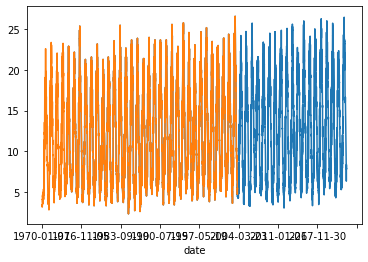

In [47]:
bafu_2243_daily["temp"].plot()
bafu_2622_daily["temp"].plot()

In [41]:
bafu_2243_daily["ph"][bafu_2243_daily.ph<=2] = np.nan

<AxesSubplot:xlabel='date'>

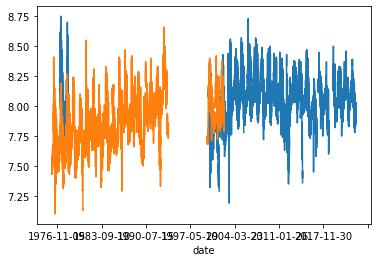

In [45]:
bafu_2243_daily["ph"].plot()
bafu_2622_daily["ph"].plot()

<AxesSubplot:xlabel='date'>

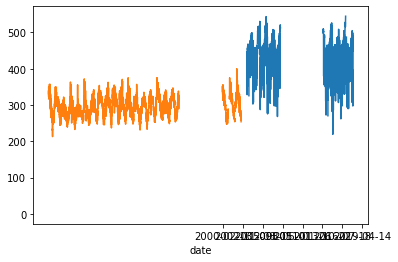

In [31]:
bafu_2243_daily["EC"].plot()
bafu_2622_daily["EC"].plot()

<AxesSubplot:xlabel='date'>

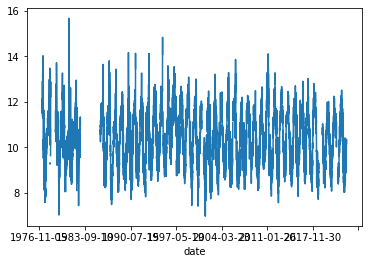

In [29]:
bafu_2243_daily["o"].plot()
#bafu_2622_daily["o"].plot()

# End